# MREN223 Lab3 - Communication

In this lab, we will look at analog to digital conversion and Amplitude modulation. 

We will require the following libraries for the lab.
`pip install scipy numpy matplotlib`

In [ ]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
from scipy.io import wavfile

%matplotlib inline

In [ ]:
# Helper functions
def load_music(filename):
    '''
    Takes the location of the music WAV file as a input and returns 
    the sampling frequency (Hz) of the sound file, the time array 
    of the digital sound signal (sec), and the sound channels.
    
    inputs:
        filename (str)
    outputs:
        fs (int)
        t List[float]
        channels List[List[float]]
    '''
    fs, data = wavfile.read(filename)
    num_channels = np.shape(data)[1]
    
    L = np.shape(data)[0]
    t = np.array(range(0, L))/fs

    channels = {}
    for n in range(num_channels):
        channels[str(n+1)] = [data[i][n] for i in range(L)]
    
    return fs, t, channels

def write_music(filename, data, fs):
    '''
    Writes the sound data into a WAV file with location filename. 
    The sampling frequency is given in Hz, and the data is given as
    a dictionary of which the values are the channels in the music file.
    
    inputs:
        filename (str)
        data Dict{any: List[float]}
        fs (int)
    outputs:
        None
    '''
    df = pd.DataFrame(data)
    wavfile.write(filename=filename, rate=fs, data=np.array(df).astype(np.int16))
    return None

def freq_spectrum(data, fs, lim=None):
    '''
    Plots the frequency spectrum of music channels with sampling frequency fs (Hz).
    
    inputs:
        data List[float]
        fs (int)
        lim (optional to limit plots x-axis) (float)
    outputs:
        None
    '''
    N = np.size(data)

    yf = fft(data) # fft of the signal 

    xf = fftfreq(N, 1/fs)
    xf = fftshift(xf) #  preparing the x-axis for the spectrum

    yplot = fftshift(yf)

    plt.plot(xf, 1.0/N * np.abs(yplot))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    if lim is not None:
        plt.xlim([-lim,lim])
    plt.grid()
    return None

## Analog-to-Digital

Two parameters are of most importance when converting from analog to digital and vice-versa. The Analog to Digital Conversion (ADC) (1) sampling rate and the (2) bit-length. Both help us determine how well the information contained in the digital signal will help us reconstruct the analog signal.

The **ADC sampling rate** (or sampling frequency [Hz]) involves the number of samples or data points that are taken from the analog signal within one second. We need sufficient samples to be able to reliably reconstruct the analog signal from the digital signal. 
If the sampling rate is low and the frequency of the signal is high, the ADC will not be able to collect sufficient information to reconstruct the original analog signal. Hence, the higher the frequencies in the analog signal, the higher our sampling frequency will need to be to capture them.
Aliasing occurs when there is not enough information in the digital signal to reliably reconstruct the analog signal.
Attempting to reconstruct the analog signal yields a signal that differs significantly from the original analog signal.

The higher the sampling rate of the ADC, the higher the frequencies it can capture. However, it also comes at a memory, bandwidth, and latency cost as each additional sample needs more memory space to be stored, or bandwidth to be transmitted in communication.

The ADC **bit-length** determines the resolution (precision) of the reconstructed audio. The bit-length refers to the memory allotted to each sample. If we store a sample in 1 bit, we will have a choice of 0 or 1 as the value for the sample. In 2 bits, we will have 00, 01, 10 and 11, meaning that we will have more choice in choosing how to store the sample. The figure below illustrates that having a larger bit-length allows more precise reconstruction of a sine-wave. 

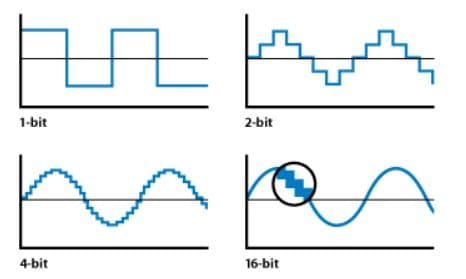
*Source: Apple Inc – Soundtrack Pro 3: Audio Fundamentals*

It can be observed in the figure, that the ADC reconstruction is in 'levels'. The number of levels allowed by some bit-length $b$ is $2^b$. 
In sound equipment, these levels correspond to voltage levels. If the speaker system's takes in 5 VDC and the bit-length is 8 bits (256 levels). Then the voltage is split to intervals of (5/256 =) 19.53 mV. The smaller the intervals, the more precise the volume from the speakers will be.
Common bit-lengths are 4, 8, 10, 12, 14, 16, 18, 20, 24, 34. 

Again, while a higher bit-length allows for better resolution, it also comes at the cost of memory.

To practice these concepts, we will upload a speech snippet of Morgan Freeman in the Shawshank Redemption.

In [ ]:
fs, t, channels = load_music('morganFreeman.wav')

In [ ]:
channel1 = np.array(channels['1'])
channel2 = np.array(channels['2'])

N = np.logical_and(165 < t, t <= 225) # trimming a second from it
t = t[N]
t = t - t[0]
channel1 = channel1[N]
channel2 = channel2[N]

### Lab Description - Part 1

The snippet is already digital, but it is sampled at a high sampling rate of 48 kHz (check out `fs`) and with a bit-length of 16 bits.
We want to resample the audio at a lower sampling rate to reduce the memory taken by the snippet while preserving our ability to hear and understand what Morgan Freeman says.

- Change the sampling rate and bit-length of the audio to minimize the storage while preserving reconstruction. Save the final audio using `write_music`. 
Take note of the memory size of the original and resampled audio.
What is the improvement in memory used?
What sampling rate did you use, and why?
What bit-length did you use?

Note that WAV files are saved in unit16. After reducing the bit-length, you will have to map your solution to the uint16 space to save the WAV file properly.

## Amplitude Modulation

The AM button on your car's radio is short for Amplitude modulation. 

Amplitude modulation (AM) is a technique used for transmitting messages (audio, songs, radio show, etc) in a radio wave. 
The purpose of modulation is to allow a high frequency signal to carry the information of a message with much lower frequency. For example, AM radio operates within the frequency range 535 to 1705 kHz to carry audio signals. In the case of human speech is a morning radio show, the human vocal range in maxes at 17KHz. 

The high frequency signal is called a carrier signal. 
In AM, the amplitude (signal strength) of the carrier signal is varied in proportion to that of the message signal.

Amplitude modulation is performed as follows:

Let the carrier signal be a sinusoid with amplitude $A$ and carrier frequency $f_c$:
$$c(t) = A \sin(2 \pi f_c t)$$

and a message signal $m(t)$.

The output signal is 
$$y(t) = \left(1 + \frac{m(t)}{A}\right) c(t)$$

Let's demonstrate AM with an example sinusoid message signal with with amplitude $A_m$ and message frequency $f_m$:
$$m(t) = A_m \cos(2 \pi f_m t)$$

In [ ]:
t = np.arange(0,3,0.001)
A = 1
m = 0.9
fc = 10
fm = 1

carrier = A*np.sin(2*np.pi*fc*t)
message = m*A*np.cos(2*np.pi*fm*t)

plt.plot(t, carrier);
plt.plot(t, message);
plt.legend(['Carrier', 'Message']);

In [ ]:
output = (1 + message/A)*carrier
plt.plot(t, output);
plt.plot(t, message);
plt.plot(t, message+1, 'k--');
plt.legend(['Output', 'Message']);

### Lab Description - Part 2

We will modulate the Morgan Freeman Speech from before. Use the resampled version that you have extracted. 

1) Choose an AM frequency from the AM frequency range given above, and construct your AM carrier signal.
2) Modulate the Morgan Freeman speech. Prepare the plot of a 100 millisecond snippet of the AM output to show the grading TA.
3) Next, develop an algorithm to demodulate the AM output, i.e., recover the message (speech) back from the AM output. (Hint: observe how the message envelopes the top of the AM output.)
Save the recovered speech as a WAV file. You might play this for the grading TA.
Prepare an explanation of your demodulation approach. 